In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering

##### All the  " -   " values in the dataset were considered 0.

In [2]:
df = pd.read_csv("farmers_salary_transactions.csv",na_values= " -   ",index_col="Farmer No.",thousands=',')

#####  Total number of missing weekly payments ( weeks when the farmer's income was 0) were calculated. All the farmers with less than 13 weeks of payment were eliminated.

In [3]:
df.reset_index(level=0, inplace=True)
for i in range(0,1275):
    df.loc[i,'MissingWeeks'] =  df.loc[i].isna().sum()
for i in range(0,1275):
    if(df.loc[i,'MissingWeeks']>39):
        df.drop(i,axis=0,inplace=True)
df.reset_index(level=0, inplace=True)
df.drop("index",axis=1,inplace=True)
df=df.fillna(0)
df

,Farmer No.,Week1,Week2,Week3,Week4,Week5,Week6,Week7,Week8,Week9,...,Week44,Week45,Week46,Week47,Week48,Week49,Week50,Week51,Week52,MissingWeeks
0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2918.0,1882.0,1939.0,1115.0,29.0
1,2,6487.0,10898.0,5133.0,3138.0,3056.0,5293.0,3170.0,2751.0,0.0,...,0.0,1931.0,122.0,0.0,2704.0,7147.0,5125.0,2589.0,917.0,8.0
2,3,1289.0,1392.0,1789.0,1319.0,662.0,2290.0,1994.0,2527.0,1172.0,...,2306.0,1206.0,1417.0,1310.0,2153.0,1771.0,3527.0,3665.0,3110.0,7.0
3,4,3844.0,4256.0,3716.0,4511.0,5209.0,7299.0,9899.0,7440.0,1915.0,...,26493.0,1217.0,2791.0,0.0,5203.0,7938.0,1909.0,850.0,546.0,2.0
4,5,3428.0,2346.0,2419.0,2110.0,1569.0,2110.0,1951.0,936.0,169.0,...,1216.0,657.0,225.0,357.0,0.0,0.0,181.0,189.0,76.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1246,1271,0.0,706.0,3507.0,908.0,1008.0,794.0,336.0,170.0,0.0,...,5160.0,5899.0,12465.0,13900.0,14840.0,10741.0,12040.0,9241.0,10365.0,18.0
1247,1272,174233.0,90237.0,65438.0,23628.0,2536.0,3241.0,2550.0,1662.0,977.0,...,2736.0,2681.0,4051.0,2703.0,3651.0,4974.0,2088.0,2112.0,3358.0,2.0
1248,1273,9490.0,18144.0,1728.0,1573.0,0.0,0.0,1564.0,655.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0
1249,1274,40052.0,16401.0,6779.0,24153.0,26360.0,5329.0,4225.0,696.0,0.0,...,0.0,0.0,0.0,0.0,13824.0,16870.0,15624.0,5414.0,9373.0,34.0


##### As most banks calculate a credit score for each applicant to decide whether he/she is eligible for the loan or not, a similar strategy was devised. The mean weekly income over a window of 13 weeks and the average number of non payments in 13 weeks for each farmer were calculated.

In [4]:
li_final=[]
li_mean=[]
li_std=[]
li_farm=[]
for i in range(0,1251):
    x_mean=df.loc[i,"Week1":"Week52"].rolling(window=13,center=False).mean()
    x_mean.dropna(inplace=True)
    x_mean=x_mean.tolist()
    m= sum(x_mean) / len(x_mean)
    li_mean.append(m)
    li_farm.append(df.loc[i,"Farmer No."])
new_df=pd.DataFrame()
new_df["Mean"]=li_mean
new_df["Farmer No."]=li_farm
for i in range(0,1251):
    li=[]
    for j in range(1,41):
        c=0
        var1 = "Week{weekno}".format(weekno=j)
        var2 = "Week{weekno}".format(weekno=j+12)
        for k in df.loc[i,var1:var2]:
            if(k==0):
                c=c+1
        li.append(c)
    li_final.append(sum(li)/len(li))
li_final
new_df["Zeros"]=li_final
new_temp=new_df.copy()
new_temp.drop("Farmer No.",axis=1,inplace=True)

In [5]:
new_temp

,Mean,Zeros
0,9181.186538,6.650
1,11496.648077,1.875
2,8015.492308,1.925
3,87371.017308,0.150
4,1356.207692,2.475
...,...,...
1246,1540.178846,4.900
1247,39650.913462,0.275
1248,11140.801923,5.000
1249,2619.236538,9.850


##### Hierarchical Clustering was applied considring all the relevant factors. Initially only 2 clusters were implemented (i.e for eligible and ineligible applicants). Agglomerative form was considered because applicants alike in their income and non payments need to be coalesced together.

In [6]:
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
new_df["Eligibility"]=cluster.fit_predict(new_temp)

In [7]:
new_df

,Mean,Farmer No.,Zeros,Eligibility
0,9181.186538,1,6.650,0
1,11496.648077,2,1.875,0
2,8015.492308,3,1.925,0
3,87371.017308,4,0.150,0
4,1356.207692,5,2.475,0
...,...,...,...,...
1246,1540.178846,1271,4.900,0
1247,39650.913462,1272,0.275,0
1248,11140.801923,1273,5.000,0
1249,2619.236538,1274,9.850,0


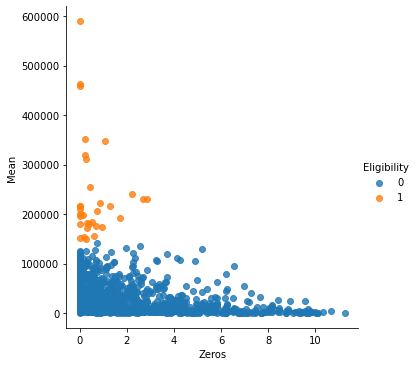

In [8]:
plot = sns.lmplot(data=new_df, x='Zeros', y='Mean', hue='Eligibility',fit_reg=False, legend=True, legend_out=True)

##### Dendogram for this cluster was plotted which states the ideal number of clusters to be used is 3. 

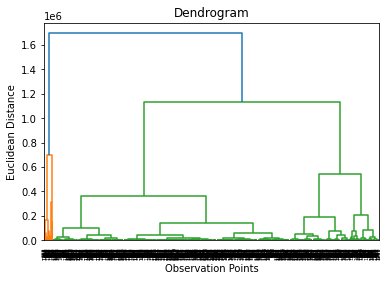

In [10]:
import scipy.cluster.hierarchy as sch
X = new_temp.iloc[:, [0, 1]].values
dendrogram=sch.dendrogram(sch.linkage(X,method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Observation Points')
plt.ylabel('Euclidean Distance')
plt.show()

##### Another agglomerative clustering model with 3 clusters was implemented.

In [9]:
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
new_df["Eligibility"]=cluster.fit_predict(new_temp)

In [10]:
new_df

,Mean,Farmer No.,Zeros,Eligibility
0,9181.186538,1,6.650,2
1,11496.648077,2,1.875,2
2,8015.492308,3,1.925,2
3,87371.017308,4,0.150,1
4,1356.207692,5,2.475,2
...,...,...,...,...
1246,1540.178846,1271,4.900,2
1247,39650.913462,1272,0.275,1
1248,11140.801923,1273,5.000,2
1249,2619.236538,1274,9.850,2


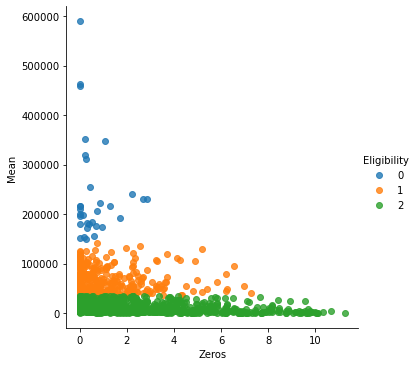

In [11]:
plot = sns.lmplot(data=new_df, x='Zeros', y='Mean', hue='Eligibility',fit_reg=False, legend=True, legend_out=True)

##### Some important calculations were done to further tweak the clustering results.

In [14]:
mean_temp=np.percentile(new_df["Mean"],95)
print(mean_temp)
mean_temp=np.percentile(new_df["Mean"],90)
print(mean_temp)
mean_temp=np.percentile(new_df["Mean"],75)
print(mean_temp)
zero_temp=np.percentile(new_df["Zeros"],25)
print(zero_temp)

103961.17692307693
75708.09615384614
40540.1423076923
0.15


##### Farmers with mean income not ranging in the 90th percentile were placed in cluster-2.  

In [12]:
for i in range(0,1251):
    if(new_df.loc[i,"Eligibility"]==1 and new_df.loc[i,"Mean"]<75708.09615384614):
        new_df.at[i,"Eligibility"]= 2

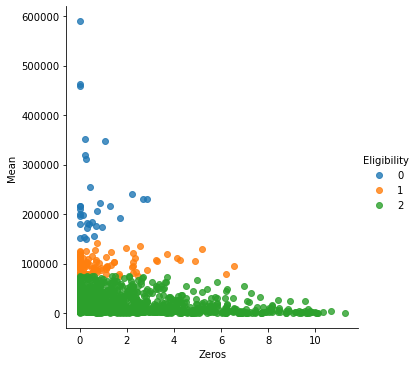

In [13]:
plot = sns.lmplot(data=new_df, x='Zeros', y='Mean', hue='Eligibility',fit_reg=False, legend=True, legend_out=True)

##### On observing the above graph , a conclusion was made that several farmers with low income were consistent in payments. So all the farmers in the top 75 percentile with respect to their mean weekly income and mean non- payments were placed in cluster-1.

In [14]:
for i in range(0,1251):
    if(new_df.loc[i,"Zeros"]<=0.15 and new_df.loc[i,"Eligibility"]==2 and new_df.loc[i,"Mean"]>40540.1423076923):
        new_df.at[i,"Eligibility"]= 1

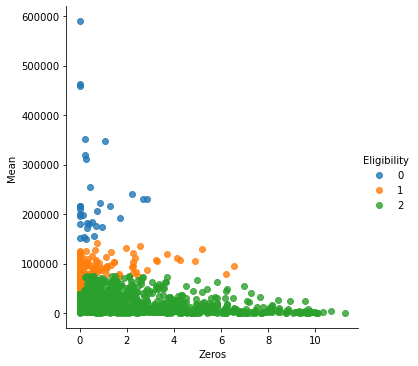

In [15]:
plot = sns.lmplot(data=new_df, x='Zeros', y='Mean', hue='Eligibility',fit_reg=False, legend=True, legend_out=True)

##### There were several farmers in cluster-0 who had high income but also high number of non-payments. Framers with number of non payments within 1.5 and in the top 5 percentile with respect to thier mean weekly income were placed in cluster-1

In [18]:
for i in range(0,1251):
    if(1<new_df.loc[i,"Zeros"]<1.5 and new_df.loc[i,"Eligibility"]!=2 and new_df.loc[i,"Mean"]>103961.17692307693):
        new_df.at[i,"Eligibility"]= 1

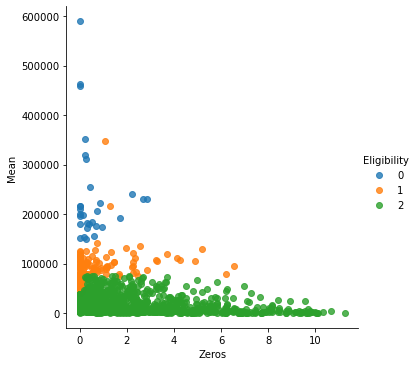

In [19]:
plot = sns.lmplot(data=new_df, x='Zeros', y='Mean', hue='Eligibility',fit_reg=False, legend=True, legend_out=True)

##### Farmers with number of non payments exceeding 1.5 were placed in cluster-2.

In [20]:
for i in range(0,1251):
    if(new_df.loc[i,"Zeros"]>1.5 and new_df.loc[i,"Eligibility"]!=2):
        new_df.at[i,"Eligibility"]= 2

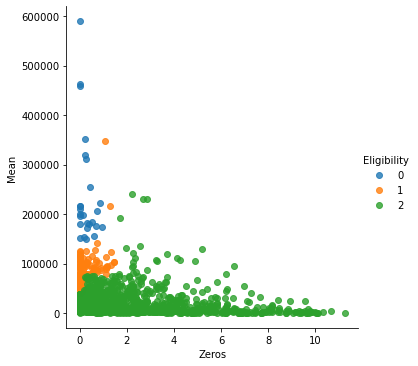

In [21]:
plot = sns.lmplot(data=new_df, x='Zeros', y='Mean', hue='Eligibility',fit_reg=False, legend=True, legend_out=True)

##### All the farmers in cluster-0 who had number of non-payments greater than 0.5 were placed in cluster-1.

In [22]:
for i in range(0,1251):
    if(new_df.loc[i,"Zeros"]>0.5 and new_df.loc[i,"Eligibility"]==0):
        new_df.at[i,"Eligibility"]= 1

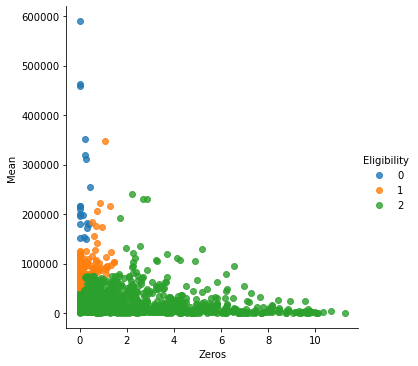

In [23]:
plot = sns.lmplot(data=new_df, x='Zeros', y='Mean', hue='Eligibility',fit_reg=False, legend=True, legend_out=True)

##### Total number of eligible farmers were calculated.

In [24]:
c=0
for i in range(0,1251):
    if(new_df.loc[i,"Eligibility"]== 0 or new_df.loc[i,"Eligibility"]== 1):
        c=c+1
print(c)

158


##### After extensive research on the rate of interest on micorloans in India, rates were decided  for each cluster. RBI guidelines for regulation of microloans were also taken into consideration and a formula was devised for calculation of total amount of loan to be provided to each farmer.

In [37]:
li_loan=[]
li_interest=[]
for i in range(0,1251):
    if(new_df.loc[i,"Eligibility"]==0):
        x=(new_df.loc[i,"Mean"]*130)/21 #20% interest
        li_loan.append(x)
    elif(new_df.loc[i,"Eligibility"]==1):
        x=(new_df.loc[i,"Mean"]*104)/17 #25% interest
        li_loan.append(x)
    else:
        x= 0.0
        li_loan.append(x)
new_df["Loan"]=li_loan

##### List of farmers in cluster-0

In [29]:
new_df.loc[new_df["Eligibility"]==0]

,Mean,Farmer No.,Zeros,Eligibility,Loan
219,217184.682692,223,0.000,0,1.344477e+06
222,150199.034615,226,0.250,0,9.298035e+05
246,215574.367308,250,0.000,0,1.334508e+06
310,209423.659615,317,0.000,0,1.296432e+06
344,171678.334615,352,0.325,0,1.062771e+06
354,195615.826923,362,0.000,0,1.210955e+06
357,180682.313462,365,0.375,0,1.118510e+06
364,153646.978846,372,0.200,0,9.511480e+05
432,589868.084615,440,0.000,0,3.651564e+06
434,462229.038462,442,0.000,0,2.861418e+06


##### List of farmers in cluster-1

In [31]:
new_df.loc[new_df["Eligibility"]==1]

,Mean,Farmer No.,Zeros,Eligibility,Loan
3,87371.017308,4,0.150,1,5.345050e+05
22,103692.380769,23,0.000,1,6.343534e+05
28,114496.351923,29,1.125,1,7.004483e+05
29,347950.855769,30,1.075,1,2.128641e+06
31,223150.571154,32,0.875,1,1.365156e+06
...,...,...,...,...,...
1201,48924.921154,1225,0.000,1,2.993054e+05
1207,41306.955769,1231,0.000,1,2.527014e+05
1228,155330.971154,1252,0.600,1,9.502601e+05
1240,77280.217308,1265,0.225,1,4.727731e+05


##### If the bank were to give out loans to even the ineligible farmers, the interest rates can be increased.

#####  0 rate of interest 20% 1 rate of interest 25% 2 rate of interest 27.5%



In [38]:
li_loan=[]
li_interest=[]
for i in range(0,1251):
    if(new_df.loc[i,"Eligibility"]==0):
        x=(new_df.loc[i,"Mean"]*130)/21
        li_loan.append(x)
    elif(new_df.loc[i,"Eligibility"]==1):
        x=(new_df.loc[i,"Mean"]*104)/17
        li_loan.append(x)
    else:
        x=(new_df.loc[i,"Mean"]*1040)/171
        li_loan.append(x)
new_df["loan"]=li_loan

##### Revised list of all the farmers.

In [39]:
new_df.drop("Loan",inplace = True,axis = 1)
new_df

,Mean,Farmer No.,Zeros,Eligibility,loan
0,9181.186538,1,6.650,2,55838.795322
1,11496.648077,2,1.875,2,69921.134503
2,8015.492308,3,1.925,2,48749.192982
3,87371.017308,4,0.150,1,534505.047059
4,1356.207692,5,2.475,2,8248.280702
...,...,...,...,...,...
1246,1540.178846,1271,4.900,2,9367.169591
1247,39650.913462,1272,0.275,2,241151.754386
1248,11140.801923,1273,5.000,2,67756.923977
1249,2619.236538,1274,9.850,2,15929.859649


##### A pie chart for representation of eligible and ineligible farmers.

In [41]:
c0=0
for i in range(0,1251):
    if(new_df.loc[i,"Eligibility"]== 0 or new_df.loc[i,"Eligibility"]==1):
        c0=c0+1
c2=0
for i in range(0,1251):
    if(new_df.loc[i,"Eligibility"]== 2):
        c2=c2+1
slices = [c0,c2]

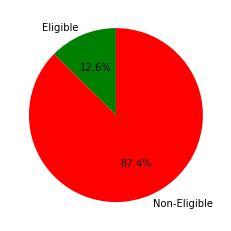

In [42]:
colors = ['g', 'r']
plt.pie(slices, labels = ['Eligible','Non-Eligible'], colors=colors, startangle=90,autopct = '%1.1f%%')
plt.show()

##### A pie chart for representation of ideal farmers ,risky farmers and ineligble farmers.

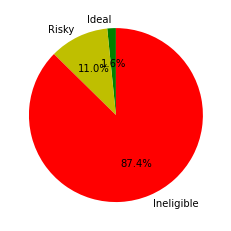

In [43]:
c1 = 0
for i in range(0,1251):
    if(new_df.loc[i,"Eligibility"]== 1):
        c1=c1+1
c00 = 0
for i in range(0,1251):
    if(new_df.loc[i,"Eligibility"]== 0):
        c00=c00+1
slices = [c00,c1,c2]
colors = ['g', 'y','r']
plt.pie(slices, labels = ['Ideal','Risky','Ineligible'], colors=colors, startangle=90,autopct = '%1.1f%%')
plt.show()

##### Number of eligible , risky and ideal farmers respectively

In [35]:
print(c0)
print(c1)
print(c00)

158
138
20


In [44]:
new_temp.to_csv('Revised_farmers.csv')